## 6.5.3 ハイパーパラメータ最適化の実装

ch06\hyperparameter_optimization.py

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.74) | lr:0.009115836054147165, weight decay:5.04517710403508e-07
Best-2(val acc:0.71) | lr:0.009869683075166762, weight decay:3.6876833144584244e-05
Best-3(val acc:0.7) | lr:0.008456299493007156, weight decay:1.373713146058917e-06
Best-4(val acc:0.7) | lr:0.007083054599277462, weight decay:1.1524622232473349e-07
Best-5(val acc:0.65) | lr:0.006569877501631361, weight decay:2.40811166787216e-08
Best-6(val acc:0.64) | lr:0.005998942760408202, weight decay:2.1968894603906715e-05
Best-7(val acc:0.64) | lr:0.005032755319375018, weight decay:2.9724230634657378e-08
Best-8(val acc:0.6) | lr:0.0042820744487847935, weight decay:1.2257131749452876e-05
Best-9(val acc:0.59) | lr:0.005188156725848554, weight decay:2.9607798633640967e-08
Best-10(val acc:0.53) | lr:0.00721945269799525, weight decay:3.553137411328252e-05
Best-11(val acc:0.43) | lr:0.0023864531374198825, weight decay:1.7473127379932142e-07
Best-12(val acc:0.39) 

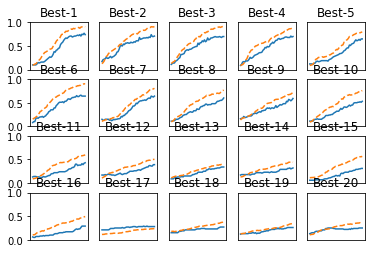

In [2]:
# 過学習を発生させる例
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
##    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()